# Làm sạch và Chuẩn bị Dữ liệu

Notebook này thực hiện các tác vụ làm sạch dữ liệu:
1. Xử lý Missing Values
2. Loại bỏ Duplicate
3. Xử lý Outlier
4. Chuẩn hóa dữ liệu
5. Vector hóa (TF-IDF)


In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Thiết lập hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Đã import các thư viện thành công!")


Đã import các thư viện thành công!


## 1. Load dữ liệu


In [3]:
# Load các dataset
books = pd.read_csv('../dataset/Books.csv')
users = pd.read_csv('../dataset/Users.csv')
ratings = pd.read_csv('../dataset/Ratings.csv')

print("=" * 50)
print("THÔNG TIN DATASET BAN ĐẦU")
print("=" * 50)
print(f"\nBooks shape: {books.shape}")
print(f"Users shape: {users.shape}")
print(f"Ratings shape: {ratings.shape}")

print("\n" + "=" * 50)
print("BOOKS INFO")
print("=" * 50)
print(books.info())
print("\n" + "=" * 50)
print("USERS INFO")
print("=" * 50)
print(users.info())
print("\n" + "=" * 50)
print("RATINGS INFO")
print("=" * 50)
print(ratings.info())


THÔNG TIN DATASET BAN ĐẦU

Books shape: (271360, 8)
Users shape: (278858, 3)
Ratings shape: (1149780, 3)

BOOKS INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

USERS INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non

## 2. Exploratory Data Analysis (EDA) - Phân tích dữ liệu ban đầu


In [7]:
# Kiểm tra Missing Values
print("=" * 50)
print("MISSING VALUES")
print("=" * 50)
print("\n--- Books ---")
print(books.isnull().sum())
print(f"\nTổng số missing: {books.isnull().sum().sum()}")

print("\n--- Users ---")
print(users.isnull().sum())
print(f"\nTổng số missing: {users.isnull().sum().sum()}")

print("\n--- Ratings ---")
print(ratings.isnull().sum())
print(f"\nTổng số missing: {ratings.isnull().sum().sum()}")

# Kiểm tra Duplicates
print("\n" + "=" * 50)
print("DUPLICATES")
print("=" * 50)
print(f"\nBooks duplicates (theo ISBN): {books.duplicated(subset=['ISBN']).sum()}")
print(f"Users duplicates (theo User-ID): {users.duplicated(subset=['User-ID']).sum()}")
print(f"Ratings duplicates (theo User-ID + ISBN): {ratings.duplicated(subset=['User-ID', 'ISBN']).sum()}")

# Thống kê mô tả
print("\n" + "=" * 50)
print("THỐNG KÊ MÔ TẢ")
print("=" * 50)
print("\n--- Users Age ---")
print(users['Age'].describe())
print("\n--- Books Year-Of-Publication ---")
print(books['Year-Of-Publication'].describe())
print("\n--- Ratings Book-Rating ---")
print(ratings['Book-Rating'].describe())


MISSING VALUES

--- Books ---
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Tổng số missing: 7

--- Users ---
User-ID          0
Location         0
Age         110762
dtype: int64

Tổng số missing: 110762

--- Ratings ---
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Tổng số missing: 0

DUPLICATES

Books duplicates (theo ISBN): 0
Users duplicates (theo User-ID): 0
Ratings duplicates (theo User-ID + ISBN): 0

THỐNG KÊ MÔ TẢ

--- Users Age ---
count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

--- Books Year-Of-Publication ---
count     271360
unique       202
top         2002
freq       13903
Name: Year-Of-Publication, dtype: int64

--- Ratings B

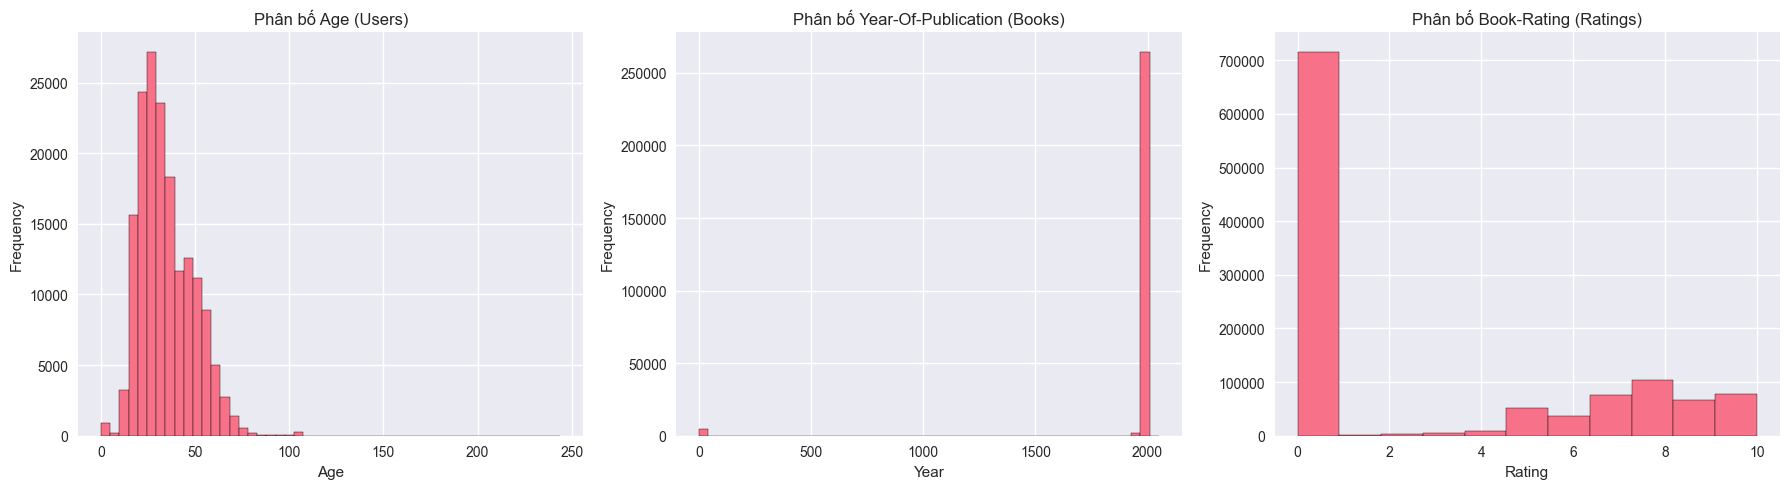

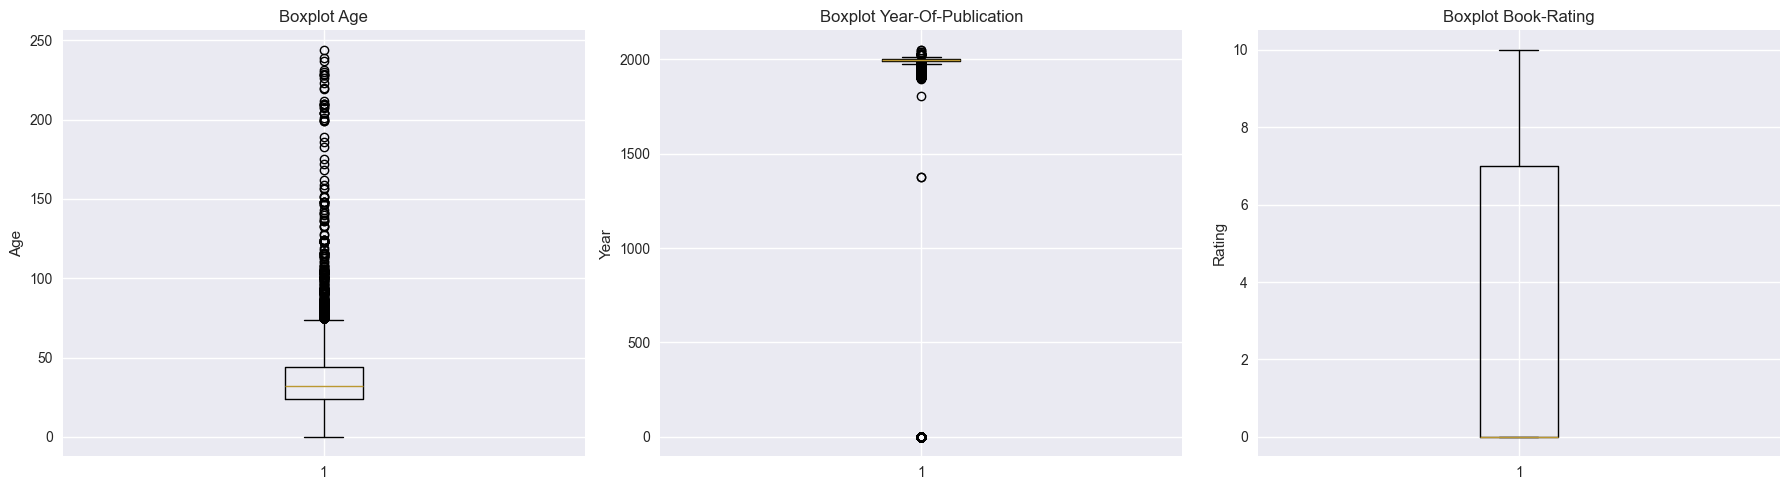

In [8]:
# Visualize để kiểm tra Outlier
# Chuyển đổi dữ liệu sang số trước khi visualize

# Chuyển đổi Year-Of-Publication sang số (loại bỏ giá trị không hợp lệ)
books_year_numeric = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Lọc Age để chỉ lấy giá trị số hợp lệ
users_age_numeric = pd.to_numeric(users['Age'], errors='coerce').dropna()

# Book-Rating đã là số, nhưng đảm bảo chắc chắn
ratings_rating_numeric = pd.to_numeric(ratings['Book-Rating'], errors='coerce').dropna()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
axes[0].hist(users_age_numeric, bins=50, edgecolor='black')
axes[0].set_title('Phân bố Age (Users)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Year distribution (chỉ lấy giá trị hợp lệ)
books_year_valid = books_year_numeric.dropna()
axes[1].hist(books_year_valid, bins=50, edgecolor='black')
axes[1].set_title('Phân bố Year-Of-Publication (Books)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Frequency')

# Rating distribution
axes[2].hist(ratings_rating_numeric, bins=11, edgecolor='black')
axes[2].set_title('Phân bố Book-Rating (Ratings)')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplot để phát hiện outlier
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].boxplot(users_age_numeric)
axes[0].set_title('Boxplot Age')
axes[0].set_ylabel('Age')

axes[1].boxplot(books_year_valid)
axes[1].set_title('Boxplot Year-Of-Publication')
axes[1].set_ylabel('Year')

axes[2].boxplot(ratings_rating_numeric)
axes[2].set_title('Boxplot Book-Rating')
axes[2].set_ylabel('Rating')

plt.tight_layout()
plt.show()


## 3. Xử lý Missing Values


In [9]:
# Tạo bản sao để làm sạch
books_cleaned = books.copy()
users_cleaned = users.copy()
ratings_cleaned = ratings.copy()

print("Đã tạo bản sao dữ liệu để làm sạch")


Đã tạo bản sao dữ liệu để làm sạch


In [10]:
# Xử lý Missing Values cho Books
print("=" * 50)
print("XỬ LÝ MISSING VALUES - BOOKS")
print("=" * 50)
print("Trước khi xử lý:")
print(books_cleaned.isnull().sum())

# Điền missing values cho Book-Author
books_cleaned['Book-Author'].fillna('Unknown', inplace=True)

# Điền missing values cho Publisher
books_cleaned['Publisher'].fillna('Unknown', inplace=True)

# Chuyển đổi Year-Of-Publication sang số trước khi xử lý missing
books_cleaned['Year-Of-Publication'] = pd.to_numeric(books_cleaned['Year-Of-Publication'], errors='coerce')

# Điền missing values cho Year-Of-Publication bằng median
median_year = books_cleaned['Year-Of-Publication'].median()
books_cleaned['Year-Of-Publication'].fillna(median_year, inplace=True)

# Điền missing values cho Image URLs (có thể để trống hoặc điền 'N/A')
books_cleaned['Image-URL-S'].fillna('N/A', inplace=True)
books_cleaned['Image-URL-M'].fillna('N/A', inplace=True)
books_cleaned['Image-URL-L'].fillna('N/A', inplace=True)

print("\nSau khi xử lý:")
print(books_cleaned.isnull().sum())
print(f"\nTổng số missing còn lại: {books_cleaned.isnull().sum().sum()}")


XỬ LÝ MISSING VALUES - BOOKS
Trước khi xử lý:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Sau khi xử lý:
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Tổng số missing còn lại: 0


In [11]:
# Xử lý Missing Values cho Users
print("=" * 50)
print("XỬ LÝ MISSING VALUES - USERS")
print("=" * 50)
print("Trước khi xử lý:")
print(users_cleaned.isnull().sum())
print(f"\nTỷ lệ missing Age: {users_cleaned['Age'].isnull().sum() / len(users_cleaned) * 100:.2f}%")

# Điền missing Age bằng median
median_age = users_cleaned['Age'].median()
users_cleaned['Age'].fillna(median_age, inplace=True)

# Xử lý Location nếu có missing (thường không có nhưng kiểm tra)
users_cleaned['Location'].fillna('Unknown', inplace=True)

print("\nSau khi xử lý:")
print(users_cleaned.isnull().sum())
print(f"\nTổng số missing còn lại: {users_cleaned.isnull().sum().sum()}")


XỬ LÝ MISSING VALUES - USERS
Trước khi xử lý:
User-ID          0
Location         0
Age         110762
dtype: int64

Tỷ lệ missing Age: 39.72%

Sau khi xử lý:
User-ID     0
Location    0
Age         0
dtype: int64

Tổng số missing còn lại: 0


In [12]:
# Xử lý Missing Values cho Ratings
print("=" * 50)
print("XỬ LÝ MISSING VALUES - RATINGS")
print("=" * 50)
print("Trước khi xử lý:")
print(ratings_cleaned.isnull().sum())

# Nếu có missing trong Book-Rating, xóa dòng đó (vì rating là bắt buộc)
if ratings_cleaned['Book-Rating'].isnull().sum() > 0:
    ratings_cleaned = ratings_cleaned.dropna(subset=['Book-Rating'])
    print(f"\nĐã xóa {ratings_cleaned['Book-Rating'].isnull().sum()} dòng có missing rating")

print("\nSau khi xử lý:")
print(ratings_cleaned.isnull().sum())
print(f"\nTổng số missing còn lại: {ratings_cleaned.isnull().sum().sum()}")


XỬ LÝ MISSING VALUES - RATINGS
Trước khi xử lý:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Sau khi xử lý:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Tổng số missing còn lại: 0


## 4. Loại bỏ Duplicate


In [13]:
# Loại bỏ Duplicate cho Books (theo ISBN)
print("=" * 50)
print("LOẠI BỎ DUPLICATE - BOOKS")
print("=" * 50)
print(f"Số duplicate trước: {books_cleaned.duplicated(subset=['ISBN']).sum()}")

books_cleaned = books_cleaned.drop_duplicates(subset=['ISBN'], keep='first')

print(f"Số duplicate sau: {books_cleaned.duplicated(subset=['ISBN']).sum()}")
print(f"Shape sau khi loại bỏ: {books_cleaned.shape}")


LOẠI BỎ DUPLICATE - BOOKS
Số duplicate trước: 0
Số duplicate sau: 0
Shape sau khi loại bỏ: (271360, 8)


In [14]:
# Loại bỏ Duplicate cho Users (theo User-ID)
print("=" * 50)
print("LOẠI BỎ DUPLICATE - USERS")
print("=" * 50)
print(f"Số duplicate trước: {users_cleaned.duplicated(subset=['User-ID']).sum()}")

users_cleaned = users_cleaned.drop_duplicates(subset=['User-ID'], keep='first')

print(f"Số duplicate sau: {users_cleaned.duplicated(subset=['User-ID']).sum()}")
print(f"Shape sau khi loại bỏ: {users_cleaned.shape}")


LOẠI BỎ DUPLICATE - USERS
Số duplicate trước: 0
Số duplicate sau: 0
Shape sau khi loại bỏ: (278858, 3)


In [15]:
# Loại bỏ Duplicate cho Ratings (theo User-ID + ISBN)
print("=" * 50)
print("LOẠI BỎ DUPLICATE - RATINGS")
print("=" * 50)
print(f"Số duplicate trước: {ratings_cleaned.duplicated(subset=['User-ID', 'ISBN']).sum()}")

# Nếu có duplicate, giữ rating trung bình
if ratings_cleaned.duplicated(subset=['User-ID', 'ISBN']).sum() > 0:
    # Tính trung bình rating cho các cặp duplicate
    ratings_cleaned = ratings_cleaned.groupby(['User-ID', 'ISBN'])['Book-Rating'].mean().reset_index()
    print("Đã tính trung bình rating cho các duplicate")
else:
    ratings_cleaned = ratings_cleaned.drop_duplicates(subset=['User-ID', 'ISBN'], keep='first')

print(f"Số duplicate sau: {ratings_cleaned.duplicated(subset=['User-ID', 'ISBN']).sum()}")
print(f"Shape sau khi loại bỏ: {ratings_cleaned.shape}")


LOẠI BỎ DUPLICATE - RATINGS
Số duplicate trước: 0
Số duplicate sau: 0
Shape sau khi loại bỏ: (1149780, 3)


## 5. Xử lý Outlier


In [16]:
# Xử lý Outlier cho Books - Year-Of-Publication
print("=" * 50)
print("XỬ LÝ OUTLIER - BOOKS (Year-Of-Publication)")
print("=" * 50)
print(f"Shape trước: {books_cleaned.shape}")
print(f"Min Year: {books_cleaned['Year-Of-Publication'].min()}")
print(f"Max Year: {books_cleaned['Year-Of-Publication'].max()}")

# Loại bỏ năm < 1000 hoặc > 2024 (hoặc năm hiện tại)
current_year = 2024
books_cleaned = books_cleaned[
    (books_cleaned['Year-Of-Publication'] >= 1000) & 
    (books_cleaned['Year-Of-Publication'] <= current_year)
]

print(f"\nShape sau: {books_cleaned.shape}")
print(f"Min Year sau: {books_cleaned['Year-Of-Publication'].min()}")
print(f"Max Year sau: {books_cleaned['Year-Of-Publication'].max()}")
print(f"Số dòng đã xóa: {books.shape[0] - books_cleaned.shape[0]}")


XỬ LÝ OUTLIER - BOOKS (Year-Of-Publication)
Shape trước: (271360, 8)
Min Year: 0.0
Max Year: 2050.0

Shape sau: (266730, 8)
Min Year sau: 1376.0
Max Year sau: 2024.0
Số dòng đã xóa: 4630


In [17]:
# Xử lý Outlier cho Users - Age
print("=" * 50)
print("XỬ LÝ OUTLIER - USERS (Age)")
print("=" * 50)
print(f"Shape trước: {users_cleaned.shape}")
print(f"Min Age: {users_cleaned['Age'].min()}")
print(f"Max Age: {users_cleaned['Age'].max()}")

# Loại bỏ tuổi < 5 hoặc > 120
users_cleaned = users_cleaned[
    (users_cleaned['Age'] >= 5) & 
    (users_cleaned['Age'] <= 120)
]

print(f"\nShape sau: {users_cleaned.shape}")
print(f"Min Age sau: {users_cleaned['Age'].min()}")
print(f"Max Age sau: {users_cleaned['Age'].max()}")
print(f"Số dòng đã xóa: {users.shape[0] - users_cleaned.shape[0]}")


XỬ LÝ OUTLIER - USERS (Age)
Shape trước: (278858, 3)
Min Age: 0.0
Max Age: 244.0

Shape sau: (277898, 3)
Min Age sau: 5.0
Max Age sau: 119.0
Số dòng đã xóa: 960


In [18]:
# Xử lý Outlier cho Ratings - Book-Rating
print("=" * 50)
print("XỬ LÝ OUTLIER - RATINGS (Book-Rating)")
print("=" * 50)
print(f"Shape trước: {ratings_cleaned.shape}")
print(f"Min Rating: {ratings_cleaned['Book-Rating'].min()}")
print(f"Max Rating: {ratings_cleaned['Book-Rating'].max()}")

# Kiểm tra scale rating (thường là 0-10)
# Loại bỏ rating ngoài range 0-10
ratings_cleaned = ratings_cleaned[
    (ratings_cleaned['Book-Rating'] >= 0) & 
    (ratings_cleaned['Book-Rating'] <= 10)
]

print(f"\nShape sau: {ratings_cleaned.shape}")
print(f"Min Rating sau: {ratings_cleaned['Book-Rating'].min()}")
print(f"Max Rating sau: {ratings_cleaned['Book-Rating'].max()}")
print(f"Số dòng đã xóa: {ratings.shape[0] - ratings_cleaned.shape[0]}")


XỬ LÝ OUTLIER - RATINGS (Book-Rating)
Shape trước: (1149780, 3)
Min Rating: 0
Max Rating: 10

Shape sau: (1149780, 3)
Min Rating sau: 0
Max Rating sau: 10
Số dòng đã xóa: 0


## 6. Chuẩn hóa dữ liệu


In [19]:
# Chuẩn hóa dữ liệu cho Users - Location
print("=" * 50)
print("CHUẨN HÓA DỮ LIỆU - USERS (Location)")
print("=" * 50)

# Chuẩn hóa Location: lowercase, loại bỏ khoảng trắng thừa
users_cleaned['Location'] = users_cleaned['Location'].str.lower().str.strip()

# Chuẩn hóa Age: đảm bảo kiểu int
users_cleaned['Age'] = users_cleaned['Age'].astype(int)

print("Đã chuẩn hóa Location và Age")
print(f"\nSample Location sau chuẩn hóa:")
print(users_cleaned['Location'].head(10))


CHUẨN HÓA DỮ LIỆU - USERS (Location)
Đã chuẩn hóa Location và Age

Sample Location sau chuẩn hóa:
0                    nyc, new york, usa
1             stockton, california, usa
2       moscow, yukon territory, russia
3             porto, v.n.gaia, portugal
4    farnborough, hants, united kingdom
5         santa monica, california, usa
6                   washington, dc, usa
7              timmins, ontario, canada
8            germantown, tennessee, usa
9            albacete, wisconsin, spain
Name: Location, dtype: object


In [20]:
# Chuẩn hóa dữ liệu cho Books
print("=" * 50)
print("CHUẨN HÓA DỮ LIỆU - BOOKS")
print("=" * 50)

# Chuẩn hóa Book-Title: loại bỏ khoảng trắng thừa
books_cleaned['Book-Title'] = books_cleaned['Book-Title'].str.strip()

# Chuẩn hóa Book-Author: loại bỏ khoảng trắng thừa
books_cleaned['Book-Author'] = books_cleaned['Book-Author'].str.strip()

# Chuẩn hóa Publisher: loại bỏ khoảng trắng thừa
books_cleaned['Publisher'] = books_cleaned['Publisher'].str.strip()

# Chuẩn hóa Year-Of-Publication: đảm bảo kiểu int
books_cleaned['Year-Of-Publication'] = books_cleaned['Year-Of-Publication'].astype(int)

print("Đã chuẩn hóa các trường text và Year-Of-Publication")


CHUẨN HÓA DỮ LIỆU - BOOKS
Đã chuẩn hóa các trường text và Year-Of-Publication


In [21]:
# Chuẩn hóa dữ liệu cho Ratings
print("=" * 50)
print("CHUẨN HÓA DỮ LIỆU - RATINGS")
print("=" * 50)

# Chuẩn hóa Book-Rating: đảm bảo kiểu int (hoặc float nếu cần)
ratings_cleaned['Book-Rating'] = ratings_cleaned['Book-Rating'].astype(int)

print("Đã chuẩn hóa Book-Rating")
print(f"\nSample ratings sau chuẩn hóa:")
print(ratings_cleaned['Book-Rating'].value_counts().sort_index())


CHUẨN HÓA DỮ LIỆU - RATINGS
Đã chuẩn hóa Book-Rating

Sample ratings sau chuẩn hóa:
Book-Rating
0     716109
1       1770
2       2759
3       5996
4       8904
5      50974
6      36924
7      76457
8     103736
9      67541
10     78610
Name: count, dtype: int64


## 7. Vector hóa (TF-IDF)


In [22]:
# Vector hóa Book-Title bằng TF-IDF
print("=" * 50)
print("VECTOR HÓA - TF-IDF cho Book-Title")
print("=" * 50)

# Khởi tạo TF-IDF Vectorizer
# max_features: số lượng từ quan trọng nhất
# min_df: bỏ qua các từ xuất hiện ít hơn min_df documents
# max_df: bỏ qua các từ xuất hiện nhiều hơn max_df documents
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Lấy 5000 từ quan trọng nhất
    min_df=2,           # Từ phải xuất hiện ít nhất 2 lần
    max_df=0.95,        # Bỏ qua từ xuất hiện > 95% documents
    ngram_range=(1, 2),  # Sử dụng unigram và bigram
    stop_words='english' # Loại bỏ stop words tiếng Anh
)

# Fit và transform Book-Title
tfidf_matrix = tfidf_vectorizer.fit_transform(books_cleaned['Book-Title'])

print(f"Shape của TF-IDF matrix: {tfidf_matrix.shape}")
print(f"Số lượng features (từ vựng): {len(tfidf_vectorizer.get_feature_names_out())}")
print(f"\nSample features (20 từ đầu tiên):")
print(tfidf_vectorizer.get_feature_names_out()[:20])


VECTOR HÓA - TF-IDF cho Book-Title
Shape của TF-IDF matrix: (266730, 5000)
Số lượng features (từ vựng): 5000

Sample features (20 từ đầu tiên):
['000' '01' '02' '03' '10' '100' '1000' '1001' '101' '101 ways' '102'
 '10th' '11' '12' '13' '14' '15' '150' '16' '17']


In [23]:
# Lưu TF-IDF matrix và vectorizer (tùy chọn)
# Có thể lưu để sử dụng sau này
import pickle
import os

# Tạo thư mục cleaned nếu chưa có
os.makedirs('../dataset/cleaned', exist_ok=True)

# Lưu TF-IDF matrix và vectorizer
with open('../dataset/cleaned/tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

with open('../dataset/cleaned/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

print("Đã lưu TF-IDF matrix và vectorizer")


Đã lưu TF-IDF matrix và vectorizer


## 8. Lưu dữ liệu đã làm sạch


In [24]:
# Lưu các dataset đã làm sạch
books_cleaned.to_csv('../dataset/cleaned/Books_cleaned.csv', index=False)
users_cleaned.to_csv('../dataset/cleaned/Users_cleaned.csv', index=False)
ratings_cleaned.to_csv('../dataset/cleaned/Ratings_cleaned.csv', index=False)

print("=" * 50)
print("ĐÃ LƯU DỮ LIỆU ĐÃ LÀM SẠCH")
print("=" * 50)
print("✓ Books_cleaned.csv")
print("✓ Users_cleaned.csv")
print("✓ Ratings_cleaned.csv")


ĐÃ LƯU DỮ LIỆU ĐÃ LÀM SẠCH
✓ Books_cleaned.csv
✓ Users_cleaned.csv
✓ Ratings_cleaned.csv


## 9. Báo cáo tổng kết


In [25]:
# Báo cáo tổng kết
print("=" * 70)
print("BÁO CÁO TỔNG KẾT - LÀM SẠCH DỮ LIỆU")
print("=" * 70)

print("\n1. THAY ĐỔI KÍCH THƯỚC DATASET:")
print("-" * 70)
print(f"{'Dataset':<20} {'Trước':<20} {'Sau':<20} {'Giảm':<20}")
print("-" * 70)
print(f"{'Books':<20} {books.shape[0]:<20} {books_cleaned.shape[0]:<20} {books.shape[0] - books_cleaned.shape[0]:<20}")
print(f"{'Users':<20} {users.shape[0]:<20} {users_cleaned.shape[0]:<20} {users.shape[0] - users_cleaned.shape[0]:<20}")
print(f"{'Ratings':<20} {ratings.shape[0]:<20} {ratings_cleaned.shape[0]:<20} {ratings.shape[0] - ratings_cleaned.shape[0]:<20}")

print("\n2. MISSING VALUES:")
print("-" * 70)
print(f"Books - Missing còn lại: {books_cleaned.isnull().sum().sum()}")
print(f"Users - Missing còn lại: {users_cleaned.isnull().sum().sum()}")
print(f"Ratings - Missing còn lại: {ratings_cleaned.isnull().sum().sum()}")

print("\n3. DUPLICATES:")
print("-" * 70)
print(f"Books - Duplicates còn lại: {books_cleaned.duplicated(subset=['ISBN']).sum()}")
print(f"Users - Duplicates còn lại: {users_cleaned.duplicated(subset=['User-ID']).sum()}")
print(f"Ratings - Duplicates còn lại: {ratings_cleaned.duplicated(subset=['User-ID', 'ISBN']).sum()}")

print("\n4. THỐNG KÊ SAU KHI LÀM SẠCH:")
print("-" * 70)
print(f"Users Age - Min: {users_cleaned['Age'].min()}, Max: {users_cleaned['Age'].max()}, Mean: {users_cleaned['Age'].mean():.2f}")
print(f"Books Year - Min: {books_cleaned['Year-Of-Publication'].min()}, Max: {books_cleaned['Year-Of-Publication'].max()}")
print(f"Ratings - Min: {ratings_cleaned['Book-Rating'].min()}, Max: {ratings_cleaned['Book-Rating'].max()}, Mean: {ratings_cleaned['Book-Rating'].mean():.2f}")

print("\n5. VECTOR HÓA:")
print("-" * 70)
print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")
print(f"Số lượng features: {len(tfidf_vectorizer.get_feature_names_out())}")

print("\n" + "=" * 70)
print("HOÀN THÀNH LÀM SẠCH DỮ LIỆU!")
print("=" * 70)


BÁO CÁO TỔNG KẾT - LÀM SẠCH DỮ LIỆU

1. THAY ĐỔI KÍCH THƯỚC DATASET:
----------------------------------------------------------------------
Dataset              Trước                Sau                  Giảm                
----------------------------------------------------------------------
Books                271360               266730               4630                
Users                278858               277898               960                 
Ratings              1149780              1149780              0                   

2. MISSING VALUES:
----------------------------------------------------------------------
Books - Missing còn lại: 0
Users - Missing còn lại: 0
Ratings - Missing còn lại: 0

3. DUPLICATES:
----------------------------------------------------------------------
Books - Duplicates còn lại: 0
Users - Duplicates còn lại: 0
Ratings - Duplicates còn lại: 0

4. THỐNG KÊ SAU KHI LÀM SẠCH:
---------------------------------------------------------------------